# Continued...

# Boosting Algorithms

---

The idea of boosting came out of the idea of whether a weak learner can be modified to become better. <font color="blue">A weak hypothesis or weak learner is defined as one whose performance is at least slightly better than random chance.</font>

The first success of boosting was seen in **Adaboost** where the weak learners in AdaBoost are decision trees with a single split, called decision stumps for their shortness. AdaBoost works by weighting the observations, putting more weight on difficult to classify instances and less on those already handled well. New weak learners are added sequentially that focus their training on the more difficult patterns.

Gradient boosting involves three elements:

> * A loss function to be optimized.

> * A weak learner to make predictions.

> * An additive model to add weak learners to minimize the loss function.

### 1. Loss Function

---

The loss function used depends on the type of problem being solved.

It must be differentiable, but many standard loss functions are supported and you can define your own.

For example, regression may use a squared error and classification may use logarithmic loss.

A benefit of the gradient boosting framework is that a new boosting algorithm does not have to be derived for each loss function that may want to be used, instead, it is a generic enough framework that any differentiable loss function can be used.

### 2. Weak Learner

---

<center><img src="wl.png"></center>

Decision trees are used as the weak learner in gradient boosting.

Specifically regression trees are used that output real values for splits and whose output can be added together, allowing subsequent models outputs to be added and “correct” the residuals in the predictions.

Trees are constructed in a greedy manner, choosing the best split points based on purity scores like Gini or to minimize the loss.

Initially, such as in the case of AdaBoost, very short decision trees were used that only had a single split, called a decision stump. Larger trees can be used generally with 4-to-8 levels.

It is common to constrain the weak learners in specific ways, such as a maximum number of layers, nodes, splits or leaf nodes.

This is to ensure that the learners remain weak, but can still be constructed in a greedy manner.

### 3. Additive Model

---

<center><img src="golf.jpg"></center>

Trees are added one at a time, and existing trees in the model are not changed.

A gradient descent procedure is used to minimize the loss when adding trees.

Traditionally, gradient descent is used to minimize a set of parameters, such as the coefficients in a regression equation or weights in a neural network. After calculating error or loss, the weights are updated to minimize that error.

Instead of parameters, we have weak learner sub-models or more specifically decision trees. After calculating the loss, to perform the gradient descent procedure, we must add a tree to the model that reduces the loss (i.e. follow the gradient). We do this by parameterizing the tree, then modify the parameters of the tree and move in the right direction by (reducing the residual loss).

Generally this approach is called functional gradient descent or gradient descent with functions.

The output for the new tree is then added to the output of the existing sequence of trees in an effort to correct or improve the final output of the model.

A fixed number of trees are added or training stops once loss reaches an acceptable level or no longer improves on an external validation dataset.

<center><img src="gb.png">

### Improvements to Basic Gradient Boosting

---

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

In this this section we will look at 4 enhancements to basic gradient boosting:

> * Tree Constraints

> * Shrinkage

> * Random sampling

> * Penalized Learning

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=10, learning_rate=0.3,\
                                max_leaf_nodes=8, max_depth=3, \
                                subsample=0.8, random_state=0)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=8,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=0, subsample=0.8, verbose=0,
              warm_start=False)

In [5]:
##### predict
y_pred_train = gbm.predict(X_train)
y_pred = gbm.predict(X_test)

In [6]:
print('training recall: {}'.format(recall_score(y_true=y_train, y_pred=y_pred_train)))
print('test recall: {}'.format(recall_score(y_true=y_test, y_pred=y_pred)))

training recall: 0.4388185654008439
test recall: 0.3020833333333333


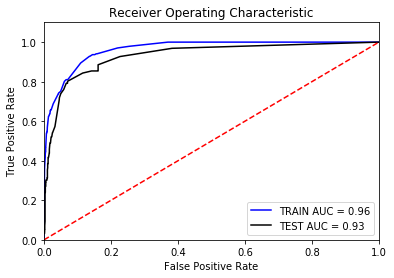

In [7]:
# training
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm.predict_proba(X_train)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'TRAIN AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

# test
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc_2 = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k', label = 'TEST AUC = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

In [8]:
gbm.feature_importances_

array([0.01886411, 0.71358115, 0.26755474])

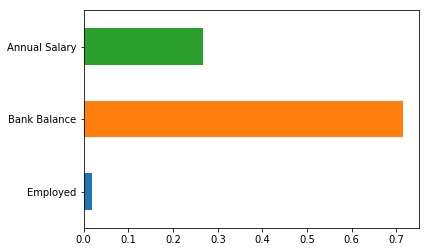

In [9]:
pd.Series(gbm.feature_importances_, index=X_train.columns).plot(kind='barh')
plt.show()

## XGBoost - Penalized Gradient Boosting

---

Additional constraints can be imposed on the parameterized trees in addition to their structure.

Classical decision trees like CART are not used as weak learners, instead a modified form called a regression tree is used that has numeric values in the leaf nodes (also called terminal nodes). The values in the leaves of the trees can be called weights in some literature.

As such, the leaf weight values of the trees can be regularized using popular regularization functions, such as:

> * L1 regularization of weights.

> * L2 regularization of weights.

In [ ]:
# https://xgboost.readthedocs.io/en/latest/tutorials/model.html